# Assessment


Some modules that would be used

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Task1 - Data Preparation

### 1.1 Import the dataset

In [23]:
# load data set
data_path = os.path.join(os.getcwd(),'Assessment1_Dataset.csv')
dataset = pd.read_csv(data_path,header=None,sep=',')

# Use the first row as the column name and reload the dataset
dataset.columns = dataset.iloc[0]
dataset = dataset[1:]

dataset

,Producer,Amino_acid,Malic_acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid_phenols,Proanth,Colo_int,Hue,OD,Proline
1,1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,1,13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050
3,1,13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185
4,1,14.37,1.95,2.5,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480
5,1,13.24,2.59,2.87,21,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
175,3,13.4,3.91,2.48,23,102,1.8,0.75,0.43,1.41,7.3,0.7,1.56,750
176,3,13.27,4.28,2.26,20,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
177,3,13.17,2.59,2.37,20,120,1.65,0.68,0.53,1.46,9.3,0.6,1.62,840


### 1.2 Preprocess the data

In [24]:
np.random.seed(4)

# Check for any NaN values, and if present drop the row
dataset = dataset.dropna()

# Normalization
dataset = np.array(dataset, dtype=float)

col_norm = np.linalg.norm(dataset[:,1:],axis=0)
dataset[:,1:] = dataset[:,1:] / col_norm[np.newaxis,:]

# calculate the number of different classes to ensure the balance
# class1
class1_index = np.where(dataset[:, 0] == 1)
class1_select = np.random.choice(class1_index[0], size=int(0.25*class1_index[0].shape[0]), replace=False)

# class2
class2_index = np.where(dataset[:, 0] == 2)
class2_select = np.random.choice(class2_index[0], size=int(0.25*class2_index[0].shape[0]), replace=False)

# class3
class3_index = np.where(dataset[:, 0] == 3)
class3_select = np.random.choice(class3_index[0], size=int(0.25*class3_index[0].shape[0]), replace=False)

# set the testing index
test_index = np.concatenate((class1_select, class2_select, class3_select))
# set the training index
train_index = list(set(np.arange(dataset.shape[0])) - set(test_index))

# rearange the index of dataset
#index = np.arange(dataset.shape[0])

# shuffle the dataset
#np.random.shuffle(index)

# split training set and testing set
#train_num = int(dataset.shape[0] * ratio)

# training set
trainset = dataset[train_index]
# testing set
testset = dataset[test_index]

print(trainset.shape)
print(testset.shape)

(135, 14)
(43, 14)


In [25]:
# K-fold cross validation (manipulate on trainset)
k = 5

# rearange trainset
idx = np.arange(trainset.shape[0])

# shuffle
np.random.shuffle(idx)
#print(idx)
 
# split trainset
splitted_index = np.array_split(idx, k)
for index_ in splitted_index:
    sub_trainset = trainset[index_]
    #print(sub_trainset.shape)
    
# generate k_trainset and k_validateset according to index    
def generate_k_fold_training_validating_trainset(splitted_index, test_index, trainset):
    k_validateset = trainset[splitted_index[test_index]]
    k_trainset = []
    for i in range(len(splitted_index)):
        if i != test_index:
            k_trainset.append(trainset[splitted_index[i]])
    k_trainset = np.concatenate(k_trainset, axis=0)
    return k_trainset, k_validateset

# test it
k_trainset, k_validateset = generate_k_fold_training_validating_trainset(splitted_index, 1, trainset)
print(k_trainset.shape, k_validateset.shape)

(108, 14) (27, 14)


## Task2 - Model Construction

### 2.1 Loss function

In [26]:
def cross_entropy_loss(y_pred, y_true):
    logp = np.log(np.sum(y_pred * y_true, axis=1))
    loss = -np.mean(logp) 
    return loss

### 2.2 Network Design

2.2-1 Activation Function

In [27]:
# Relu Function
def relu(x):
    return np.maximum(0, x)

In [28]:
# Softmax Function for classification
def softmax(x):
    e_x = np.exp(x)
    return e_x / np.sum(e_x, axis=1, keepdims=True)

2.2-2 Network Construction: Forward Pass

In [29]:
# W1, b1, W2, b2, W3, b3 are parameters of the NN
def forwardProp(W_1, b_1, W_2, b_2, W_3, b_3, x):
    # 1. go to the first layer, get z_1
    z_1 = np.matmul(x, W_1) + b_1
    # 2. get activation a_1
    a_1 = relu(z_1)
    
    # 3. go to the second layer, get z_2
    z_2 = np.matmul(a_1, W_2) + b_2
    # 4. get activation a_2
    a_2 = relu(z_2)
    
    # 5. go to the output layer, get z_3
    z_3 = np.matmul(a_2, W_3) + b_3
    # 6. get activation a_3
    a_3 = softmax(z_3)
    
    return z_1, a_1, z_2, a_2, z_3, a_3

2.2-3 Network Construction: Backward Propogation

In [30]:
# Relu derivative
def relu_derivative(x):
    return (x > 0).astype(int)

In [31]:
def backProp(z_1, a_1, z_2, a_2, z_3, a_3, x, gt, W_1, W_2, W_3):
    # output layer, gt should be [1,0,0] or [0, 1, 0] or [0,0,1]
    dz_3 = a_3 - gt
    dW_3 = np.matmul(a_2.T, dz_3)
    db_3 = np.mean(dz_3, axis=0)
    da_2 = np.matmul(dz_3, W_3.T)
    
    # second layer
    dz_2 = da_2 * relu_derivative(z_2)
    dW_2 = np.matmul(a_1.T, dz_2)
    db_2 = np.mean(dz_2, axis=0)
    da_1 = np.matmul(dz_2, W_2.T)
    
    # first layer
    dz_1 = da_1 * relu_derivative(z_1)
    dW_1 = np.matmul(x.T, dz_1)
    db_1 = np.mean(dz_1, axis=0)
    
    return dW_1, db_1, dW_2, db_2, dW_3, db_3

### 2.3 Gradient Descent

2.3-1 Create mini batches

In [32]:
# create mini-batches
def create_mini_batches(trainset, batch_size):
    y_data = trainset[:, 0].astype(np.int32)
    X_data = trainset[:, 1:]
    #print(y_data.shape)
    
    mini_batches = []
    
    # index
    index = np.arange(X_data.shape[0])
    np.random.shuffle(index)
    mini_batch_index = [index[i:i+batch_size] for i in range(0, index.shape[0], batch_size)]
    #print(mini_batch_index)
    
    mini_batch_x = []
    mini_batch_y = []
    for batch_index_ in mini_batch_index:
        #print(batch_index_)
        
        mini_batch_x.append(X_data[batch_index_])
        
        #create one hot label to record the target
        one_hot_label = np.zeros((batch_index_.shape[0], 3))
        #print(one_hot_label)
        one_hot_label[np.arange(one_hot_label.shape[0]), y_data[batch_index_]-1] = 1
        #print(y_data[batch_index_])
        #print(one_hot_label)
        mini_batch_y.append(one_hot_label)
    return mini_batch_x, mini_batch_y

# test it
mini_batch_x, mini_batch_y = create_mini_batches(k_trainset, 16)
print(mini_batch_x[1].shape)
print(mini_batch_y[1].shape)
#print(mini_batch_y)

(16, 13)
(16, 3)


2.3-2 SGD

In [33]:
def SGD(W_1, b_1, W_2, b_2, W_3, b_3, dW_1, db_1, dW_2, db_2, dW_3, db_3, lr):
    W_1 = W_1 - lr * dW_1
    b_1 = b_1 - lr * db_1
    W_2 = W_2 - lr * dW_2
    b_2 = b_2 - lr * db_2
    W_3 = W_3 - lr * dW_3
    b_3 = b_3 - lr * db_3
    return W_1, b_1, W_2, b_2, W_3, b_3



# advanced optimisation Adam
class Adam:
    def __init__(self, lr, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.t = 0
        self.m_w1 = None
        self.v_w1 = None
        self.m_w2 = None
        self.v_w2 = None
        self.m_w3 = None
        self.v_w3 = None
        self.m_b1 = None
        self.v_b1 = None
        self.m_b2 = None
        self.v_b2 = None
        self.m_b3 = None
        self.v_b3 = None
        self.epsilon = epsilon
        self.beta1 = beta1
        self.beta2 = beta2
         
        
    def update(self, W_1, b_1, W_2, b_2, W_3, b_3, dW_1, db_1, dW_2, db_2, dW_3, db_3):
        self.t += 1
        
        if self.m_w1 is None:
            self.m_w1 = dW_1
            self.v_w1 = dW_1 ** 2
        else:
            self.m_w1 = self.beta1 * self.m_w1 + (1 - self.beta1) * dW_1
            self.v_w1 = self.beta2 * self.v_w1 + (1 - self.beta2) * (dW_1**2)
        m_w1_ = self.m_w1 / (1 - self.beta1 ** self.t)
        v_w1_ = self.v_w1 / (1 - self.beta2 ** self.t)
        W_1 = W_1 - lr * m_w1_ / np.sqrt(self.epsilon + v_w1_)
        
        if self.m_w2 is None:
            self.m_w2 = dW_2
            self.v_w2 = dW_2 ** 2
        else:
            self.m_w2 = self.beta1 * self.m_w2 + (1 - self.beta1) * dW_2
            self.v_w2 = self.beta2 * self.v_w2 + (1 - self.beta2) * (dW_2**2)
        m_w2_ = self.m_w2 / (1 - self.beta1 ** self.t)
        v_w2_ = self.v_w2 / (1 - self.beta2 ** self.t)
        W_2 = W_2 - lr * m_w2_ / np.sqrt(self.epsilon + v_w2_)
        
        if self.m_w3 is None:
            self.m_w3 = dW_3
            self.v_w3 = dW_3 ** 2
        else:
            self.m_w3 = self.beta1 * self.m_w3 + (1 - self.beta1) * dW_3
            self.v_w3 = self.beta2 * self.v_w3 + (1 - self.beta2) * (dW_3**2)
        m_w3_ = self.m_w3 / (1 - self.beta1 ** self.t)
        v_w3_ = self.v_w3 / (1 - self.beta2 ** self.t)
        W_3 = W_3 - lr * m_w3_ / np.sqrt(self.epsilon + v_w3_)
        

        if self.m_b1 is None:
            self.m_b1 = db_1
            self.v_b1 = db_1 ** 2
        else:
            self.m_b1 = self.beta1 * self.m_b1 + (1 - self.beta1) * db_1
            self.v_b1 = self.beta2 * self.v_b1 + (1 - self.beta2) * (db_1**2)
        m_b1_ = self.m_b1 / (1 - self.beta1 ** self.t)
        v_b1_ = self.v_b1 / (1 - self.beta2 ** self.t)
        b_1 = b_1 - lr * m_b1_ / np.sqrt(self.epsilon + v_b1_)
        
        if self.m_b2 is None:
            self.m_b2 = db_2
            self.v_b2 = db_2 ** 2
        else:
            self.m_b2 = self.beta1 * self.m_b2 + (1 - self.beta1) * db_2
            self.v_b2 = self.beta2 * self.v_b2 + (1 - self.beta2) * (db_2**2)
        m_b2_ = self.m_b2 / (1 - self.beta1 ** self.t)
        v_b2_ = self.v_b2 / (1 - self.beta2 ** self.t)
        b_2 = b_2 - lr * m_b2_ / np.sqrt(self.epsilon + v_b2_)
        
        if self.m_b3 is None:
            self.m_b3 = db_3
            self.v_b3 = db_3 ** 2
        else:
            self.m_b3 = self.beta1 * self.m_b3 + (1 - self.beta1) * db_3
            self.v_b3 = self.beta2 * self.v_b3 + (1 - self.beta2) * (db_3**2)
        m_b3_ = self.m_b3 / (1 - self.beta1 ** self.t)
        v_b3_ = self.v_b3 / (1 - self.beta2 ** self.t)
        b_3 = b_3 - lr * m_b3_ / np.sqrt(self.epsilon + v_b3_)
        
        return W_1, b_1, W_2, b_2, W_3, b_3

## Task3 - Model Training

### 3.1. Model Training

3.1-1 function define

In [34]:
# Initialize W1, b1, W2, b2, W3, b3
class parameter:
    def __init__(self):
        self.W_1 = None
        self.b_1 = None
        self.W_2 = None
        self.b_2 = None
        self.W_3 = None
        self.b_3 = None

    def initialize(self, trainingset, numNeuron):
        # the parameter of the first layer
        self.W_1 = np.random.randn(trainingset.shape[1]-1, numNeuron)
        self.b_1 = np.zeros(numNeuron)
        
        # the parameter of the second layer
        self.W_2 = np.random.randn(numNeuron, numNeuron)
        self.b_2 = np.zeros(numNeuron)
        
        # the parameter of the output layer
        self.W_3 = np.random.randn(numNeuron, 3)
        self.b_3 = np.zeros(3)
        

#param including W1, b1, W2, b2, W3, b3 which are the parameters of the NN

# forward propagation using class parameter
def forwardProp2(param, x):
    # 1. get z_1
    z_1 = np.matmul(x, param.W_1) + param.b_1
    # 2. get activation a_1
    a_1 = relu(z_1)
    
    # 3. go to the second layer, get z_2
    z_2 = np.matmul(a_1, param.W_2) + param.b_2
    # 4. get activation a_2
    a_2 = relu(z_2)
    
    # 5. go to the output layer, get z_3
    z_3 = np.matmul(a_2, param.W_3) + param.b_3
    # 6. get activation a_3
    a_3 = softmax(z_3)
    
    return z_1, a_1, z_2, a_2, z_3, a_3


# SGD using class parameter
def SGD2(param, dW_1, db_1, dW_2, db_2, dW_3, db_3, lr):
    param.W_1 = param.W_1 - lr * dW_1
    param.b_1 = param.b_1 - lr * db_1
    param.W_2 = param.W_2 - lr * dW_2
    param.b_2 = param.b_2 - lr * db_2
    param.W_3 = param.W_3 - lr * dW_3
    param.b_3 = param.b_3 - lr * db_3
    return param

# advanced optimisation using class parameter
class Adam2:
    def __init__(self, lr, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.t = 0
        self.m_w1 = None
        self.v_w1 = None
        self.m_w2 = None
        self.v_w2 = None
        self.m_w3 = None
        self.v_w3 = None
        self.m_b1 = None
        self.v_b1 = None
        self.m_b2 = None
        self.v_b2 = None
        self.m_b3 = None
        self.v_b3 = None
        self.epsilon = epsilon
        self.beta1 = beta1
        self.beta2 = beta2
         
        
    def update(self, param, dW_1, db_1, dW_2, db_2, dW_3, db_3):
        self.t += 1
        
        if self.m_w1 is None:
            self.m_w1 = dW_1
            self.v_w1 = dW_1 ** 2
        else:
            self.m_w1 = self.beta1 * self.m_w1 + (1 - self.beta1) * dW_1
            self.v_w1 = self.beta2 * self.v_w1 + (1 - self.beta2) * (dW_1**2)
        m_w1_ = self.m_w1 / (1 - self.beta1 ** self.t)
        v_w1_ = self.v_w1 / (1 - self.beta2 ** self.t)
        param.W_1 = param.W_1 - lr * m_w1_ / np.sqrt(self.epsilon + v_w1_)
        
        if self.m_w2 is None:
            self.m_w2 = dW_2
            self.v_w2 = dW_2 ** 2
        else:
            self.m_w2 = self.beta1 * self.m_w2 + (1 - self.beta1) * dW_2
            self.v_w2 = self.beta2 * self.v_w2 + (1 - self.beta2) * (dW_2**2)
        m_w2_ = self.m_w2 / (1 - self.beta1 ** self.t)
        v_w2_ = self.v_w2 / (1 - self.beta2 ** self.t)
        param.W_2 = param.W_2 - lr * m_w2_ / np.sqrt(self.epsilon + v_w2_)
        
        if self.m_w3 is None:
            self.m_w3 = dW_3
            self.v_w3 = dW_3 ** 2
        else:
            self.m_w3 = self.beta1 * self.m_w3 + (1 - self.beta1) * dW_3
            self.v_w3 = self.beta2 * self.v_w3 + (1 - self.beta2) * (dW_3**2)
        m_w3_ = self.m_w3 / (1 - self.beta1 ** self.t)
        v_w3_ = self.v_w3 / (1 - self.beta2 ** self.t)
        param.W_3 = param.W_3 - lr * m_w3_ / np.sqrt(self.epsilon + v_w3_)
        

        if self.m_b1 is None:
            self.m_b1 = db_1
            self.v_b1 = db_1 ** 2
        else:
            self.m_b1 = self.beta1 * self.m_b1 + (1 - self.beta1) * db_1
            self.v_b1 = self.beta2 * self.v_b1 + (1 - self.beta2) * (db_1**2)
        m_b1_ = self.m_b1 / (1 - self.beta1 ** self.t)
        v_b1_ = self.v_b1 / (1 - self.beta2 ** self.t)
        param.b_1 = param.b_1 - lr * m_b1_ / np.sqrt(self.epsilon + v_b1_)
        
        if self.m_b2 is None:
            self.m_b2 = db_2
            self.v_b2 = db_2 ** 2
        else:
            self.m_b2 = self.beta1 * self.m_b2 + (1 - self.beta1) * db_2
            self.v_b2 = self.beta2 * self.v_b2 + (1 - self.beta2) * (db_2**2)
        m_b2_ = self.m_b2 / (1 - self.beta1 ** self.t)
        v_b2_ = self.v_b2 / (1 - self.beta2 ** self.t)
        param.b_2 = param.b_2 - lr * m_b2_ / np.sqrt(self.epsilon + v_b2_)
        
        if self.m_b3 is None:
            self.m_b3 = db_3
            self.v_b3 = db_3 ** 2
        else:
            self.m_b3 = self.beta1 * self.m_b3 + (1 - self.beta1) * db_3
            self.v_b3 = self.beta2 * self.v_b3 + (1 - self.beta2) * (db_3**2)
        m_b3_ = self.m_b3 / (1 - self.beta1 ** self.t)
        v_b3_ = self.v_b3 / (1 - self.beta2 ** self.t)
        param.b_3 = param.b_3 - lr * m_b3_ / np.sqrt(self.epsilon + v_b3_)
        
        return param

3.1-2 training

In [35]:
# learning rate
lr_list = [0.001, 0.01, 0.1]
# number of neurons
neuron_list = [32, 64, 128]
  
# create dic to store the loss    
losses = {}     

for lr in lr_list:
    
    for numNeuron in neuron_list:
        
        losses['lr_{}_neuron_{}'.format(lr,numNeuron)] = {}
        loss_train = []
        loss_validate = []
        
        acc = 0
        for i in range(5):
            loss_train_ = []
            loss_validate_ = []
            
            k_trainset, k_validateset = generate_k_fold_training_validating_trainset(splitted_index, 1, trainset)
            
            # initialize parameters of nn     
            parameters = parameter()
            parameters.initialize(k_trainset, numNeuron)
            
            # using Adam for gradient descent
            adam_optim = Adam2(lr=lr)
            
            # k_trainset
            for i in range(100):
                # create mini batch
                mini_batch_x, mini_batch_y = create_mini_batches(k_trainset, 16)
                
                train_loss_tmp = []
                
                for batch_x, batch_y in zip(mini_batch_x, mini_batch_y):
                    
                    # forward propagation
                    #z_1, a_1, z_2, a_2, z_3, a_3 = forwardProp(W_1, b_1, W_2, b_2, W_3, b_3, batch_x)
                    z_1, a_1, z_2, a_2, z_3, a_3 = forwardProp2(parameters, batch_x)
                    
                    # back propagation
                    dW_1, db_1, dW_2, db_2, dW_3, db_3 = backProp(z_1, a_1, z_2, a_2, z_3, a_3, batch_x, batch_y, parameters.W_1, parameters.W_2, parameters.W_3)
                
                    # loss function
                    training_loss = cross_entropy_loss(a_3, batch_y)
                    train_loss_tmp.append(training_loss)
                    
                    # update the hyperparameters
                    #parameters = SGD2(parameters, dW_1, db_1, dW_2, db_2, dW_3, db_3, lr )
                    parameters = adam_optim.update(parameters, dW_1, db_1, dW_2, db_2, dW_3, db_3)
                    
                    #raise NotImplementedError 
                    
                # record loss of training
                loss_train_.append(np.mean(train_loss_tmp))
                
                
                # validating loss
                x_data, y_data = k_validateset[:, 1:], k_validateset[:, 0] - 1
                y_data = np.array(y_data).astype(np.int32)
                
                z_1, a_1, z_2, a_2, z_3, a_3 = forwardProp2(parameters, x_data)
                
                one_hot_label = np.zeros((x_data.shape[0], 3))
                one_hot_label[np.arange(one_hot_label.shape[0]), y_data] = 1
                validating_loss = cross_entropy_loss(a_3, one_hot_label)
                
                # record loss of validating
                loss_validate_.append(validating_loss)
                
                
            loss_train.append(loss_train_)
            loss_validate.append(loss_validate_)
            
            # k_validateset_validating
            x_data, y_data = k_validateset[:, 1:], k_validateset[:, 0] - 1

            z_1, a_1, z_2, a_2, z_3, a_3 = forwardProp2(parameters, x_data)
            #z_1, a_1, z_2, a_2, z_3, a_3 = forwardProp(W_1, b_1, W_2, b_2, W_3, b_3, x_data)
            pred = np.argmax(a_3, axis=1)
            acc_ = (pred == y_data).mean()
            acc += acc_
            
        loss_train = np.array(loss_train)
        loss_validate = np.array(loss_validate)
        losses['lr_{}_neuron_{}'.format(lr,numNeuron)]['train'] = loss_train
        losses['lr_{}_neuron_{}'.format(lr,numNeuron)]['validate'] = loss_validate
        
        acc = acc / 5
        print("lr = {}, numNeuron={}, acc = {}".format(lr, numNeuron, acc))

lr = 0.001, numNeuron=32, acc = 0.9037037037037037
lr = 0.001, numNeuron=64, acc = 0.9703703703703702
lr = 0.001, numNeuron=128, acc = 0.9481481481481481
lr = 0.01, numNeuron=32, acc = 0.9777777777777779
lr = 0.01, numNeuron=64, acc = 0.962962962962963
lr = 0.01, numNeuron=128, acc = 0.9481481481481481
lr = 0.1, numNeuron=32, acc = 0.9777777777777779
lr = 0.1, numNeuron=64, acc = 0.9925925925925926
lr = 0.1, numNeuron=128, acc = 0.9777777777777779


### 3.2 Module Regularisation

3.2-1 Ridge Regression

In [36]:
print("Ridge Regression")

# L2 loss function
def regL2_cross_entropy_loss(y_pred, y_true, param, lambda_coef):
    logp = np.log(np.sum(y_pred * y_true, axis=1))
    loss = -np.mean(logp) + lambda_coef * (np.sum(param.W_1**2) + np.sum(param.W_2**2) + np.sum(param.W_3**2))
    return loss

# L2 backpropagation
def backProp_L2(z_1, a_1, z_2, a_2, z_3, a_3, x, gt, W_1, W_2, W_3, lambda_coef):
    # output layer, gt should be [1,0,0] or [0, 1, 0] or [0,0,1]
    dz_3 = a_3 - gt
    dW_3 = np.matmul(a_2.T, dz_3) + 2*lambda_coef*W_3
    db_3 = np.mean(dz_3, axis=0)
    da_2 = np.matmul(dz_3, W_3.T)
    
    # second layer
    dz_2 = da_2 * relu_derivative(z_2)
    dW_2 = np.matmul(a_1.T, dz_2) + 2*lambda_coef*W_2
    db_2 = np.mean(dz_2, axis=0)
    da_1 = np.matmul(dz_2, W_2.T)
    
    # first layer
    dz_1 = da_1 * relu_derivative(z_1)
    dW_1 = np.matmul(x.T, dz_1) + 2*lambda_coef*W_1
    db_1 = np.mean(dz_1, axis=0)
    
    return dW_1, db_1, dW_2, db_2, dW_3, db_3


# Training
# learning rate
lr_list = [0.001, 0.01, 0.1]

# number of neurons
neuron_list = [32, 64, 128]

# create dic to store the loss 
losses_L2 = {}

for lr in lr_list:
    
    for numNeuron in neuron_list:
        
        losses_L2['lr_{}_neuron_{}'.format(lr,numNeuron)] = {}
        loss_train = []
        loss_validate = []
        
        acc = 0
        for i in range(5):
            loss_train_ = []
            loss_validate_ = []
            
            k_trainset, k_validateset = generate_k_fold_training_validating_trainset(splitted_index, 1, trainset)
            
            # initialize parameters of nn     
            parameters = parameter()
            parameters.initialize(k_trainset, numNeuron)
            
            # using Adam for gradient descent
            adam_optim = Adam2(lr=lr)
            
            # k_trainset
            for i in range(100):
                # create mini batch
                mini_batch_x, mini_batch_y = create_mini_batches(k_trainset, 16)
                
                train_loss_tmp = []
                    
                for batch_x, batch_y in zip(mini_batch_x, mini_batch_y):
                    
                    
                    # forward propagation
                    #z_1, a_1, z_2, a_2, z_3, a_3 = forwardProp(W_1, b_1, W_2, b_2, W_3, b_3, batch_x)
                    z_1, a_1, z_2, a_2, z_3, a_3 = forwardProp2(parameters, batch_x)
                    
                    
                    lambda_coef = 0.1
                    # backward propagation
                    dW_1, db_1, dW_2, db_2, dW_3, db_3 = backProp_L2(z_1, a_1, z_2, a_2, z_3, a_3, batch_x, batch_y, parameters.W_1, parameters.W_2, parameters.W_3, lambda_coef)
                    
                    # loss function
                    training_loss = regL2_cross_entropy_loss(a_3, batch_y, parameters, lambda_coef)
                    train_loss_tmp.append(training_loss)
                
                    # update the hyperparameters
                    parameters = adam_optim.update(parameters, dW_1, db_1, dW_2, db_2, dW_3, db_3) 
                    #raise NotImplementedError
            
                # record loss of training
                loss_train_.append(np.mean(train_loss_tmp))
                
                
                # validating loss
                x_data, y_data = k_validateset[:, 1:], k_validateset[:, 0] - 1
                y_data = np.array(y_data).astype(np.int32)
                
                z_1, a_1, z_2, a_2, z_3, a_3 = forwardProp2(parameters, x_data)
                
                lambda_coef = 0.1
                one_hot_label = np.zeros((x_data.shape[0], 3))
                one_hot_label[np.arange(one_hot_label.shape[0]), y_data] = 1
                validating_loss = regL2_cross_entropy_loss(a_3, one_hot_label, parameters, lambda_coef)
                
                # record loss of validating
                loss_validate_.append(validating_loss)
                
            loss_train.append(loss_train_)
            loss_validate.append(loss_validate_)
            
            # k_validateset_validating
            x_data, y_data = k_validateset[:, 1:], k_validateset[:, 0] - 1
            
            z_1, a_1, z_2, a_2, z_3, a_3 = forwardProp2(parameters, x_data)
            #z_1, a_1, z_2, a_2, z_3, a_3 = forwardProp(W_1, b_1, W_2, b_2, W_3, b_3, x_data)
            
            pred = np.argmax(a_3, axis=1)
            acc_ = (pred == y_data).mean()
            acc += acc_
            
        loss_train = np.array(loss_train)
        loss_validate = np.array(loss_validate)
        losses_L2['lr_{}_neuron_{}'.format(lr,numNeuron)]['train'] = loss_train
        losses_L2['lr_{}_neuron_{}'.format(lr,numNeuron)]['validate'] = loss_validate
        
        acc = acc / 5
        print("lr = {}, numNeuron={}, acc = {}".format(lr, numNeuron, acc))

Ridge Regression
lr = 0.001, numNeuron=32, acc = 0.9555555555555555
lr = 0.001, numNeuron=64, acc = 0.9037037037037037
lr = 0.001, numNeuron=128, acc = 0.9555555555555555
lr = 0.01, numNeuron=32, acc = 0.9851851851851852
lr = 0.01, numNeuron=64, acc = 0.9777777777777779
lr = 0.01, numNeuron=128, acc = 0.9407407407407409
lr = 0.1, numNeuron=32, acc = 0.9111111111111111
lr = 0.1, numNeuron=64, acc = 0.9333333333333333
lr = 0.1, numNeuron=128, acc = 0.9481481481481481


3.2-2 Lasso Regression

In [37]:
print("Lasso Regression")

# L1 loss function
def regL1_cross_entropy_loss(y_pred, y_true, param, lambda_coef):
    logp = np.log(np.sum(y_pred * y_true, axis=1))
    loss = -np.mean(logp) + lambda_coef * (np.sum(np.abs(param.W_1)) + np.sum(np.abs(param.W_2)) + np.sum(np.abs(param.W_3)))
    return loss

# L1 back propagation
def backProp_L1(z_1, a_1, z_2, a_2, z_3, a_3, x, gt, W_1, W_2, W_3, lambda_coef):
    # output layer, gt should be [1,0,0] or [0, 1, 0] or [0,0,1]
    dz_3 = a_3 - gt
    dW_3 = np.matmul(a_2.T, dz_3) + lambda_coef * np.sign(W_3)
    db_3 = np.mean(dz_3, axis=0)
    da_2 = np.matmul(dz_3, W_3.T)
    
    # second layer
    dz_2 = da_2 * relu_derivative(z_2)
    dW_2 = np.matmul(a_1.T, dz_2) + lambda_coef*np.sign(W_2)
    db_2 = np.mean(dz_2, axis=0)
    da_1 = np.matmul(dz_2, W_2.T)
    
    # first layer
    dz_1 = da_1 * relu_derivative(z_1)
    dW_1 = np.matmul(x.T, dz_1) + lambda_coef*np.sign(W_1)
    db_1 = np.mean(dz_1, axis=0)
    
    return dW_1, db_1, dW_2, db_2, dW_3, db_3


# Training
# learning rate
lr_list = [0.001, 0.01, 0.1]

# nember of neurons
neuron_list = [32, 64, 128]

# create a dict to store the loss
losses_L1 = {}

for lr in lr_list:
    
    for numNeuron in neuron_list:
        
        losses_L1['lr_{}_neuron_{}'.format(lr,numNeuron)] = {}
        loss_train = []
        loss_validate = []
        
        acc = 0
        
        for i in range(5):
            loss_train_ = []
            loss_validate_ = []
            
            k_trainset, k_validateset = generate_k_fold_training_validating_trainset(splitted_index, 1, trainset)
            
            # initialize parameters of nn          
            parameters = parameter()
            parameters.initialize(k_trainset, numNeuron)
            
            # using Adam for gradient descent
            adam_optim = Adam2(lr=lr)
            
            # k_trainset_training
            for i in range(100):
                # create mini batch
                mini_batch_x, mini_batch_y = create_mini_batches(k_trainset, 16)
                
                train_loss_tmp = []
                
                for batch_x, batch_y in zip(mini_batch_x, mini_batch_y):
                    
                    # forward propagation
                    z_1, a_1, z_2, a_2, z_3, a_3 = forwardProp2(parameters, batch_x)
                    #print(np.sum(a_3, axis=1))
                    
                    lambda_coef = 0.1
                    # backward propagation
                    dW_1, db_1, dW_2, db_2, dW_3, db_3 = backProp_L1(z_1, a_1, z_2, a_2, z_3, a_3, batch_x, batch_y, parameters.W_1, parameters.W_2, parameters.W_3, lambda_coef)
                    
                    # loss function
                    training_loss = regL1_cross_entropy_loss(a_3, batch_y, parameters, lambda_coef)
                    train_loss_tmp.append(training_loss)
                    
                    # update the hyperparameters
                    parameters = adam_optim.update(parameters, dW_1, db_1, dW_2, db_2, dW_3, db_3) 
                    #raise NotImplementedError
                    
                # record mean loss of training
                loss_train_.append(np.mean(train_loss_tmp))
                
                
                # validating loss
                x_data, y_data = k_validateset[:, 1:], k_validateset[:, 0] - 1
                y_data = np.array(y_data).astype(np.int32)
                
                z_1, a_1, z_2, a_2, z_3, a_3 = forwardProp2(parameters, x_data)
                
                lambda_coef = 0.1
                one_hot_label = np.zeros((x_data.shape[0], 3))
                one_hot_label[np.arange(one_hot_label.shape[0]), y_data] = 1
                validating_loss = regL1_cross_entropy_loss(a_3, one_hot_label, parameters, lambda_coef)
                
                # record loss of validating
                loss_validate_.append(validating_loss)
                
            loss_train.append(loss_train_)
            loss_validate.append(loss_validate_)
                
            # k_validateset_validating
            x_data, y_data = k_validateset[:, 1:], k_validateset[:, 0] - 1
            z_1, a_1, z_2, a_2, z_3, a_3 = forwardProp2(parameters, x_data)
            pred = np.argmax(a_3, axis=1)
            acc_ = (pred == y_data).mean()
            acc += acc_
            
        loss_train = np.array(loss_train)
        loss_validate = np.array(loss_validate)
        losses_L1['lr_{}_neuron_{}'.format(lr,numNeuron)]['train'] = loss_train
        losses_L1['lr_{}_neuron_{}'.format(lr,numNeuron)]['validate'] = loss_validate
        
        acc = acc / 5
        print("lr = {}, numNeuron={}, acc = {}".format(lr, numNeuron, acc))
        

Lasso Regression
lr = 0.001, numNeuron=32, acc = 0.8962962962962961
lr = 0.001, numNeuron=64, acc = 0.9259259259259259
lr = 0.001, numNeuron=128, acc = 0.9185185185185185
lr = 0.01, numNeuron=32, acc = 0.962962962962963
lr = 0.01, numNeuron=64, acc = 0.9407407407407407
lr = 0.01, numNeuron=128, acc = 0.9851851851851852
lr = 0.1, numNeuron=32, acc = 0.9703703703703704
lr = 0.1, numNeuron=64, acc = 0.9111111111111111
lr = 0.1, numNeuron=128, acc = 0.9333333333333332


### 3.3 Model inference

In [38]:
# learning rate
lr = 0.1

# number of neurons
numNeuron = 64

# initialize parameters of nn           
parameters = parameter()
parameters.initialize(k_trainset, numNeuron)
adam_optim = Adam2(lr=lr)
   
acc = 0    
# trainset_training
for i in range(100):
    
    mini_batch_x, mini_batch_y = create_mini_batches(trainset, 16)
    
    for batch_x, batch_y in zip(mini_batch_x, mini_batch_y):
        # forward propagation
        z_1, a_1, z_2, a_2, z_3, a_3 = forwardProp2(parameters, batch_x)
       
        # backward propagation          
        dW_1, db_1, dW_2, db_2, dW_3, db_3 = backProp(z_1, a_1, z_2, a_2, z_3, a_3, batch_x, batch_y, parameters.W_1, parameters.W_2, parameters.W_3)
                         
        # loss function       
        loss = cross_entropy_loss(a_3, batch_y)
         
        # update the hyperparameters    
        parameters = adam_optim.update(parameters, dW_1, db_1, dW_2, db_2, dW_3, db_3) 
        #raise NotImplementedError
            
# testset_testing
x_data, y_data = testset[:, 1:], testset[:, 0] - 1
z_1, a_1, z_2, a_2, z_3, a_3 = forwardProp2(parameters, x_data)
pred = np.argmax(a_3, axis=1)
acc = (pred == y_data).mean()
           
print("lr = {}, numNeuron={}, acc = {}".format(lr, numNeuron, acc))

lr = 0.1, numNeuron=64, acc = 0.9069767441860465


## Task 4 – Evaluation

### 4.1 Present Results

4.1-1 confusion matrix

Accuracy for class 1 is 0.9302325581395349
F1-score for class 1 is 0.88


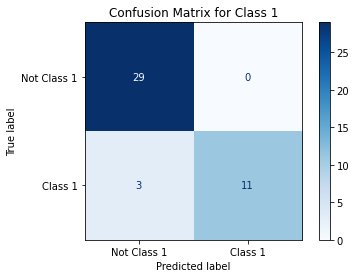

Accuracy for class 2 is 0.9069767441860465
F1-score for class 2 is 0.8888888888888888


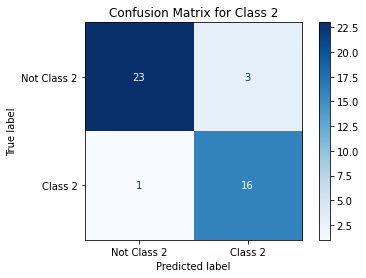

Accuracy for class 3 is 0.9767441860465116
F1-score for class 3 is 0.9600000000000001


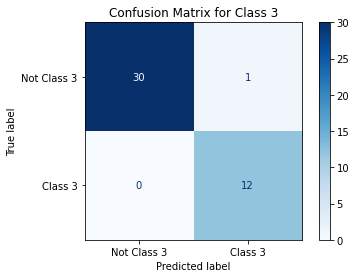

In [39]:
pred.astype(np.int32)
y_data.astype(np.int32)


# create a confusion matrix to store the records
matrix = np.zeros((3,2,2))

# record confusion matrix
for i in range(3):
    
    for index in range(pred.shape[0]):
       
        label = 1 if y_data[index] == i else 0
        prediction = 1 if pred[index] == i else 0
        
        
        # True positive
        if label == 1 and prediction == 1:
            matrix[i,1,1] += 1
        
        # False positive
        if label == 0 and prediction == 1:
            matrix[i,0,1] += 1
        
        # Ture negative
        if label == 0 and prediction == 0:
            matrix[i,0,0] += 1
            
        # False Negative
        if label == 1 and prediction == 0:
            matrix[i,1,0] += 1

# Accuracy
def Accuracy(TP, FP, TN, FN):
    accuracy = (TP + TN) / (TP + FP + TN + FN)
    return accuracy

# Precision
def Precision(TP, FP):
    precision = TP / (TP + FP)
    return precision
    
# Sensitivity / Recall
def Sensitivity(TP, FN):
    sensitivity = TP / (TP + FN)
    return sensitivity

# Specificity
def Specificity(TN, FP):
    specificity = TN / (TN + FP)
    return specificity

# NPV
def NPV(TN, FN):
    npv = TN / (TN + FN)
    return npv

# F1-score
def F1score(precision, sensitivity):
    F1score = 2 * precision * sensitivity / (precision + sensitivity)
    return F1score
    
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Plot confusion matrices and calculate metrics for each class
for class_index in range(3):
    TP = matrix[class_index, 1, 1]
    FP = matrix[class_index, 0, 1]
    TN = matrix[class_index, 0, 0]
    FN = matrix[class_index, 1, 0]
    
    precision = Precision(TP, FP)
    sensitivity = Sensitivity(TP, FN)
    accuracy = Accuracy(TP, FP, TN, FN)
    f1_score = F1score(precision, sensitivity)
    
    print(f'Accuracy for class {class_index+1} is {accuracy}')
    print(f'F1-score for class {class_index+1} is {f1_score}')
    
    # Construct a confusion matrix and plot it
    cm = np.array([[TN, FP], [FN, TP]])  # Construct a 2D confusion matrix from the values
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f'Not Class {class_index+1}', f'Class {class_index+1}'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for Class {class_index+1}')
    
    plt.savefig(f'Confusion Matrix for Class {class_index+1}.pdf')
    plt.show()
    plt.close()

4.1-2 ROC curve

In [ ]:
# class 1
TPR = []
FPR = []
for index in range(pred.shape[0]):
    

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


num_classes = 3 # three distinct classes
y_test_bin = label_binarize(y_data, classes=[1,2,3]) # binarizes the actual class labels
n_classes = y_test_bin.shape[1] # the number of classes

# Compute ROC curve and ROC area for each class
fpr = dict() # false positive rate
tpr = dict() # true positive rate
roc_auc = dict() # Area Under the Curve

# Iterates over each class to compute its ROC curve and AUC 
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], pred == i)
    roc_auc[i] = auc(fpr[i], tpr[i])

    
# Plot all ROC curves
plt.figure()
colors = iter(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

# diagonal line    
plt.plot([0, 1], [0, 1], 'k--', lw=2)
# set the x and y axis limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

### 4.2 Plot

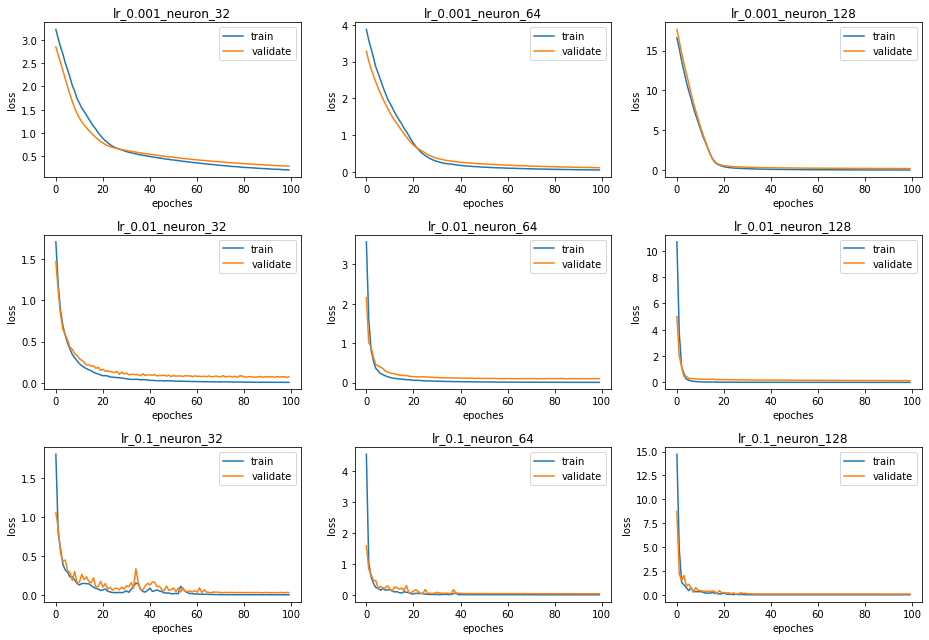

In [40]:
# training and validating loss 
index = 0
plt.figure(figsize=(13,9))
for keyname in losses.keys():
    plt.subplot(3,3,index+1)
    plt.plot(np.arange(100), losses[keyname]['train'].mean(axis=0),label='train')
    plt.plot(np.arange(100), losses[keyname]['validate'].mean(axis=0),label = 'validate')
    plt.title(keyname)
    plt.xlabel('epoches')
    plt.ylabel('loss')
    plt.legend()
    plt.tight_layout()
    index += 1

plt.savefig('plot.pdf')
plt.show()
plt.close()

Ridge regression


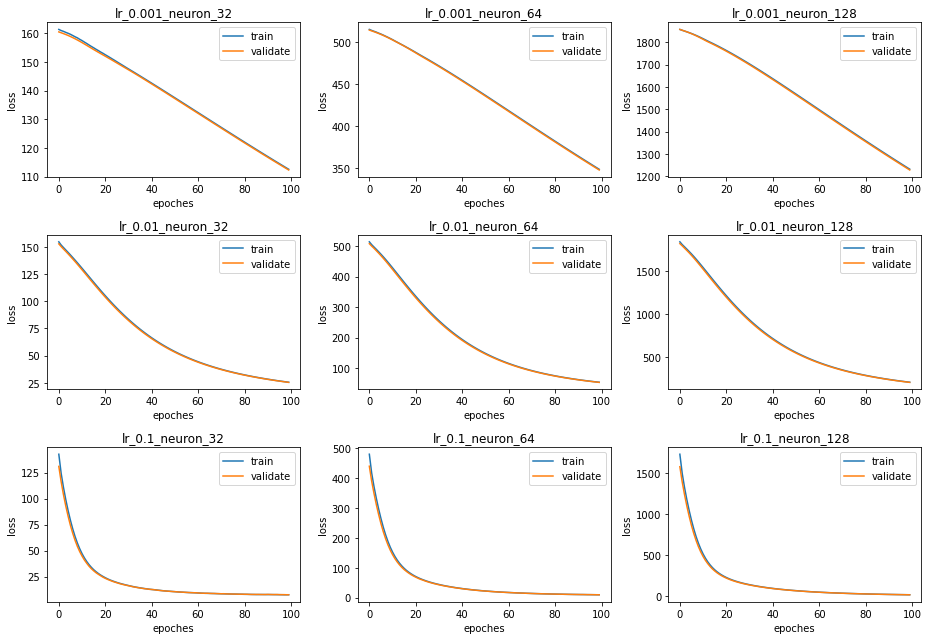

In [41]:
# training and validating loss for Ridge regression
print("Ridge regression")
index = 0
plt.figure(figsize=(13,9))
for keyname in losses_L2.keys():
    plt.subplot(3,3,index+1)
    plt.plot(np.arange(100), losses_L2[keyname]['train'].mean(axis=0),label='train')
    plt.plot(np.arange(100), losses_L2[keyname]['validate'].mean(axis=0),label = 'validate')
    plt.title(keyname)
    plt.xlabel('epoches')
    plt.ylabel('loss')
    plt.legend()
    plt.tight_layout()
    index += 1
plt.savefig('plot_L2.pdf')
plt.show()
plt.close()

Lasso regression


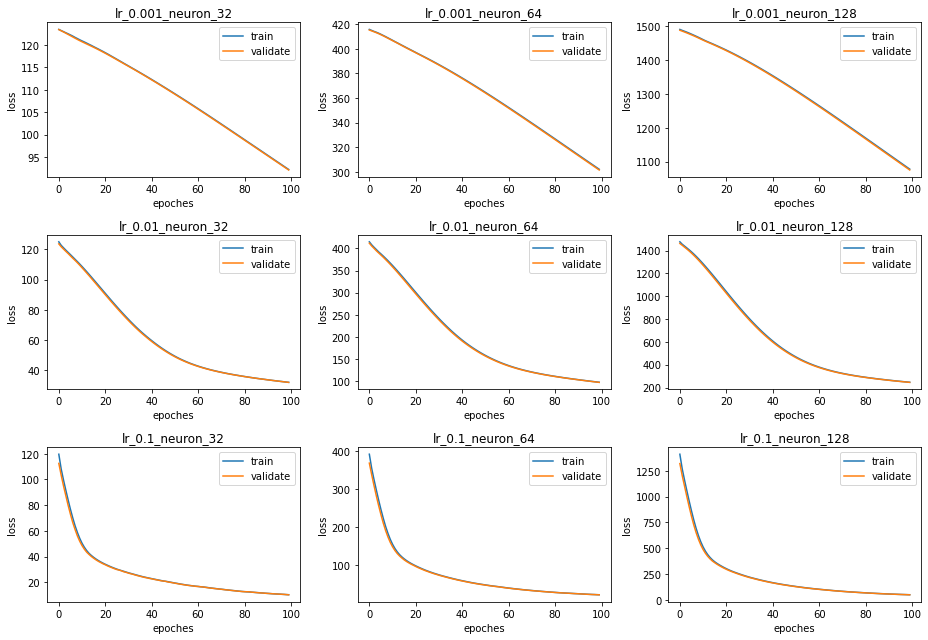

In [42]:
# training and validating loss for Lasso regression
print("Lasso regression")
index = 0
plt.figure(figsize=(13,9))
for keyname in losses_L1.keys():
    plt.subplot(3,3,index+1)
    plt.plot(np.arange(100), losses_L1[keyname]['train'].mean(axis=0),label='train')
    plt.plot(np.arange(100), losses_L1[keyname]['validate'].mean(axis=0),label = 'validate')
    plt.title(keyname)
    plt.xlabel('epoches')
    plt.ylabel('loss')
    plt.legend()
    plt.tight_layout()
    index += 1
plt.savefig('plot_L1.pdf')
plt.show()
plt.close()